<a href="https://colab.research.google.com/github/Minahil-official/Quater-2/blob/main/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import userdata
gemini_api_key= userdata.get('GOOGLE_API_KEY_2')

In [13]:
!pip install langchain_google_genai

In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate


In [15]:
initial_prompt = PromptTemplate(
    input_variables = ["question"],
    template = "change the {question} to a image generation prompt"
)
second_promt = PromptTemplate(
    input_variables = ["initial_response"],
    template = "read this {first_response} and summarize this into 2 lines for best image genaration!"
)


In [16]:
llm = ChatGoogleGenerativeAI(
    api_key = gemini_api_key,
    model = "gemini-2.0-flash-exp",
    temperature = 0.5
)

In [17]:
first_chain = initial_prompt | llm
second_chain = second_promt | llm


In [18]:
from diffusers import StableDiffusionPipeline
import torch

In [19]:
first_response = first_chain.invoke({"question" : input("type anything : ")})
print("first_chain " , first_response)

second_response = second_chain.invoke({"first_response" : first_response})
print("second_chain " , second_response)

# Pass the refined prompt to the Stable Diffusion pipeline
print("\nGenerating the image ...")

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Use GPU if available
if torch.cuda.is_available():
    pipe.to("cuda")

# Generate the image using the refined prompt
image = pipe(first_response.content).images[0]


# Save the generated image
image.save("refined_generated_image.png")
print("Image generated and saved as 'refined_generated_image.png'")

type anything : tell me about a mountain
first_chain  content='Okay, here are a few options for converting "Tell me about a mountain" into an image generation prompt, depending on the kind of mountain you want:\n\n**Option 1: Basic & Open-Ended**\n\n*   **Prompt:** "A majestic mountain rising into a clear blue sky."\n\n**Option 2: Adding Specifics (General)**\n\n*   **Prompt:** "A snow-capped mountain with rocky slopes and evergreen trees at its base."\n\n**Option 3: Adding Specifics (Location)**\n\n*   **Prompt:** "A jagged, volcanic mountain in a tropical setting with lush green vegetation."\n*   **Prompt:** "A tall, rounded mountain in a desert landscape with sparse vegetation."\n*   **Prompt:** "A towering, icy mountain in the Arctic with glaciers and snow."\n\n**Option 4: Adding Mood/Atmosphere**\n\n*   **Prompt:** "A mountain shrouded in mist, with a dramatic and mysterious atmosphere."\n*   **Prompt:** "A sunlit mountain with wildflowers blooming in the foreground, creating a pe

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (578 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['snow - capped mountain with rocky slopes and evergreen trees at its base ." ** option 3 : adding specifics ( location )** * ** prompt :** " a jagged , volcanic mountain in a tropical setting with lush green vegetation ." * ** prompt :** " a tall , rounded mountain in a desert landscape with sparse vegetation ." * ** prompt :** " a towering , icy mountain in the arctic with glaciers and snow ." ** option 4 : adding mood / atmosphere ** * ** prompt :** " a mountain shrouded in mist , with a dramatic and mysterious atmosphere ." * ** prompt :** " a sunlit mountain with wildflowers blooming in the foreground , creating a peaceful scene ." * ** prompt :** " a mountain at sunset , with the sky painted in warm o

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'refined_generated_image.png'


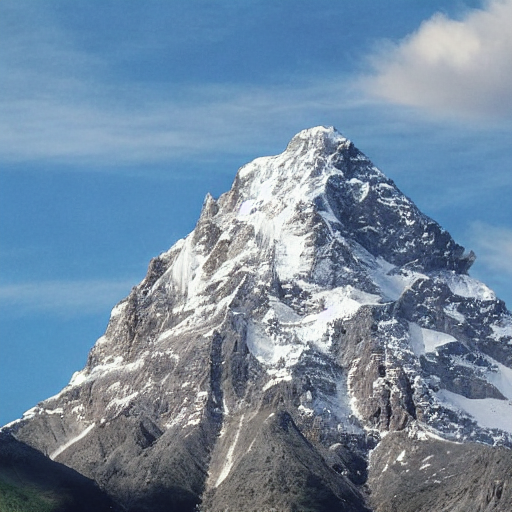

In [20]:
image